In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
url = '/content/data.csv'
df = pd.read_csv(url)

In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
'''In diagnosis
M means Malignant
B means Benign'''

'In diagnosis\nM means Malignant\nB means Benign'

In [16]:
df = df.drop(['Unnamed: 32','id'],axis=1)

In [17]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [18]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

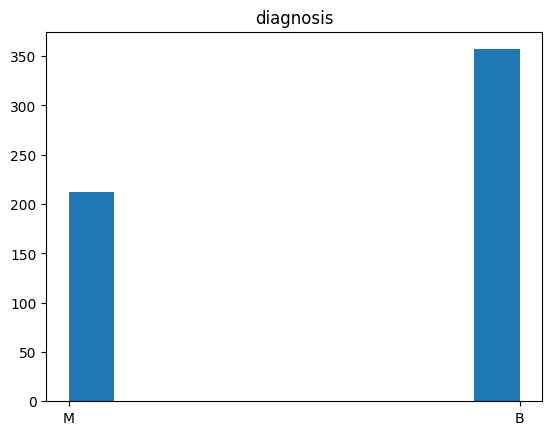

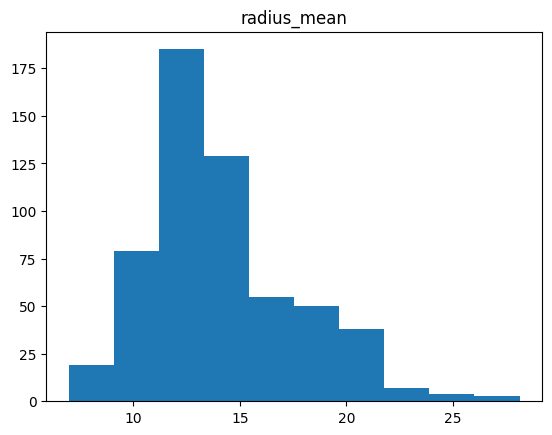

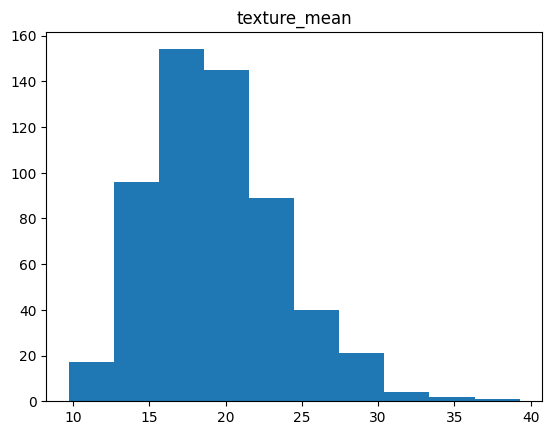

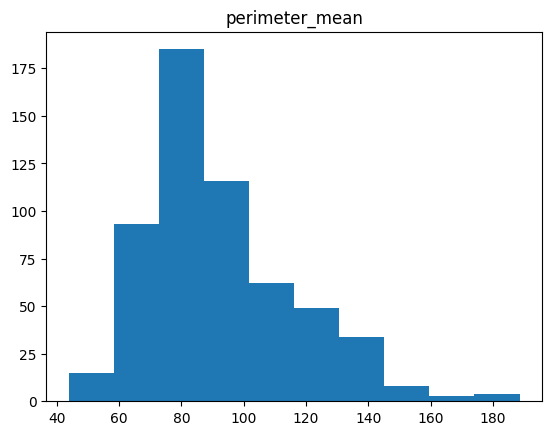

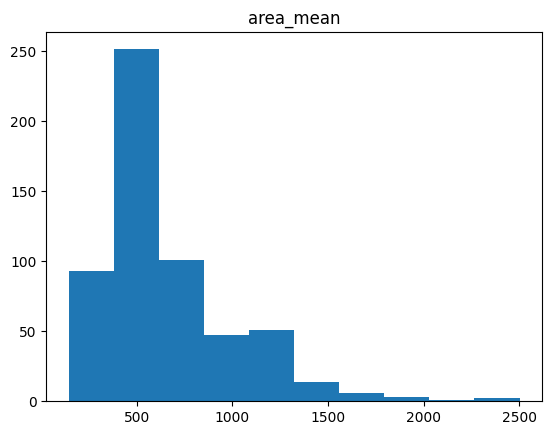

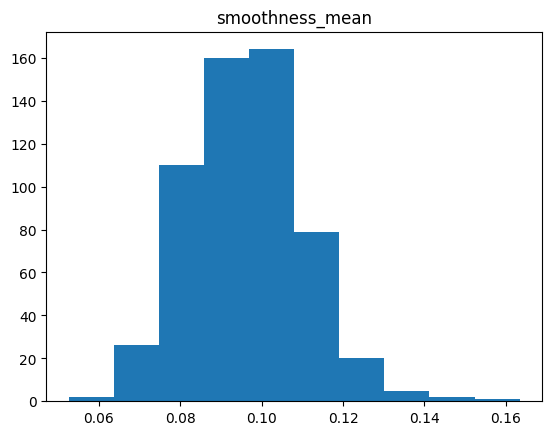

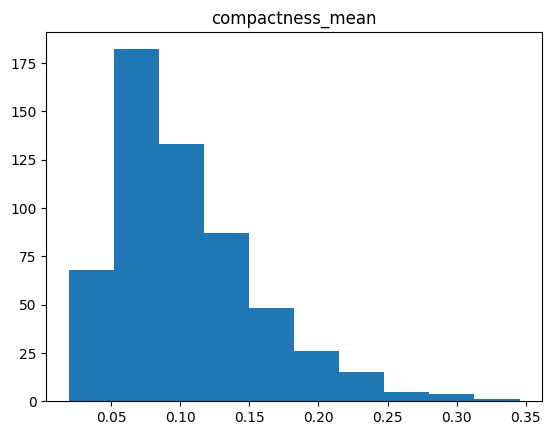

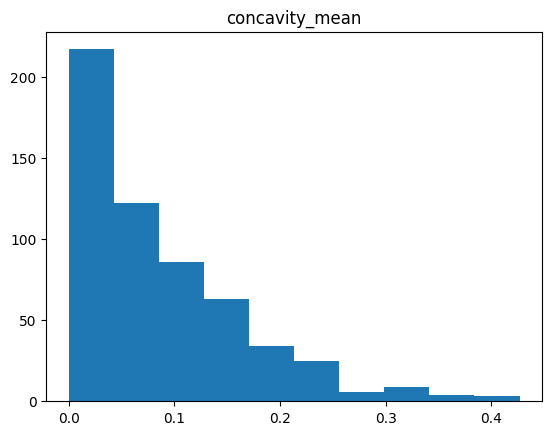

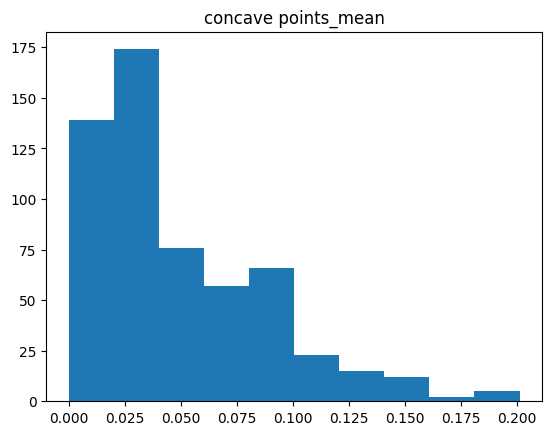

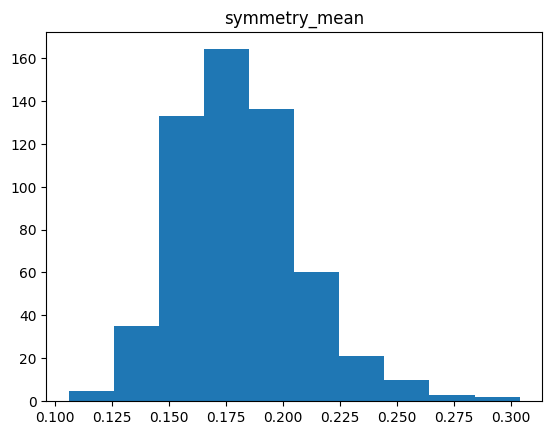

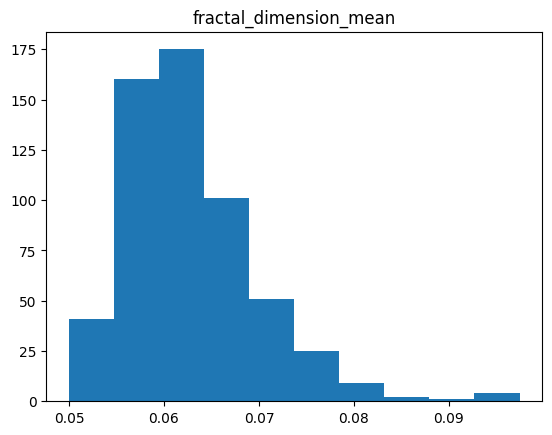

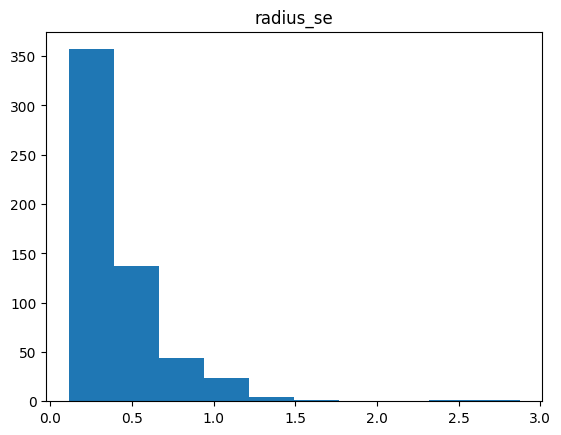

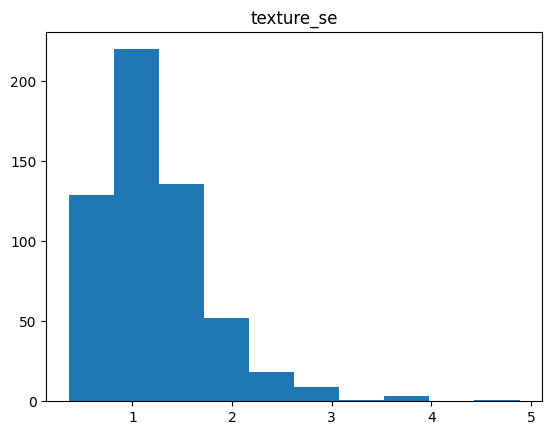

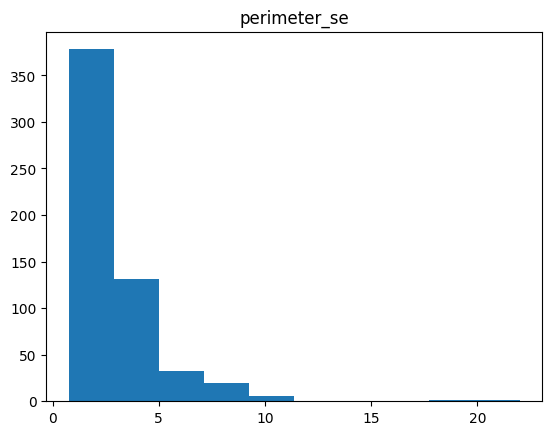

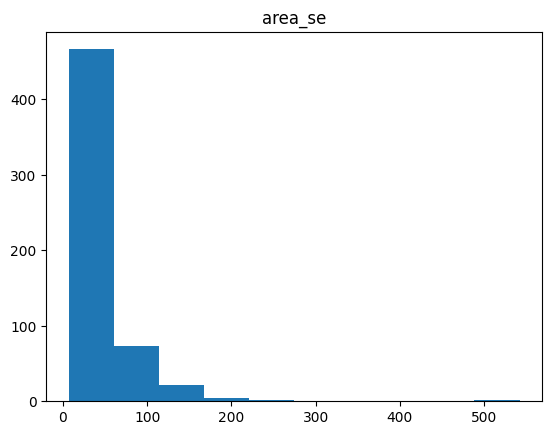

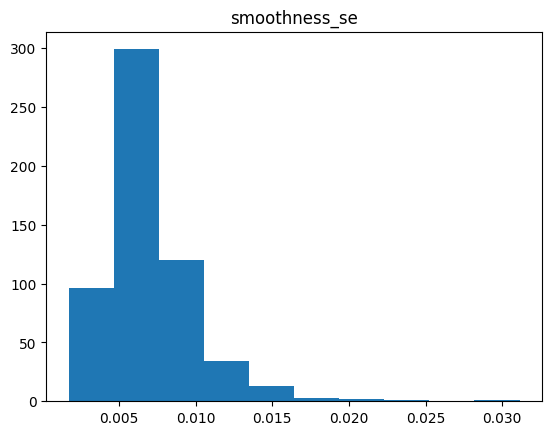

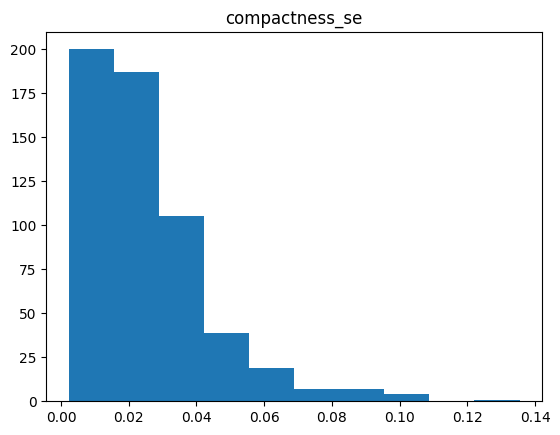

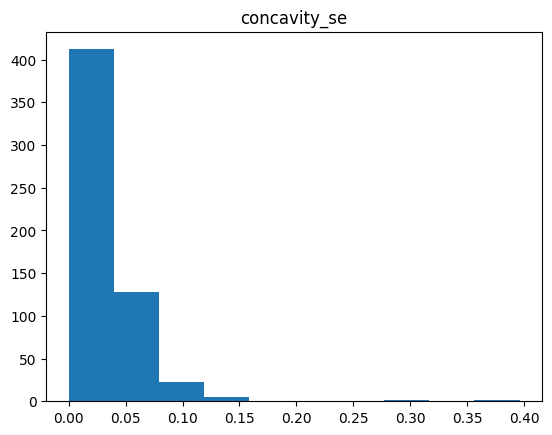

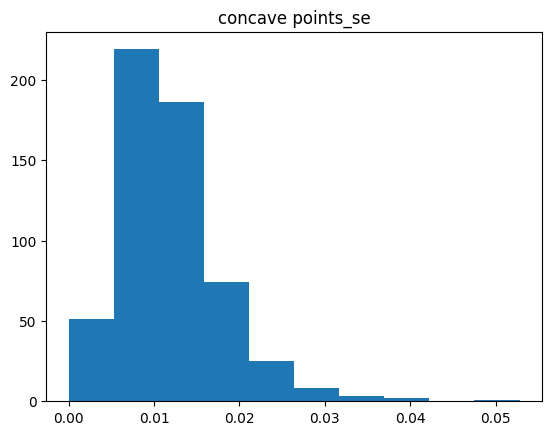

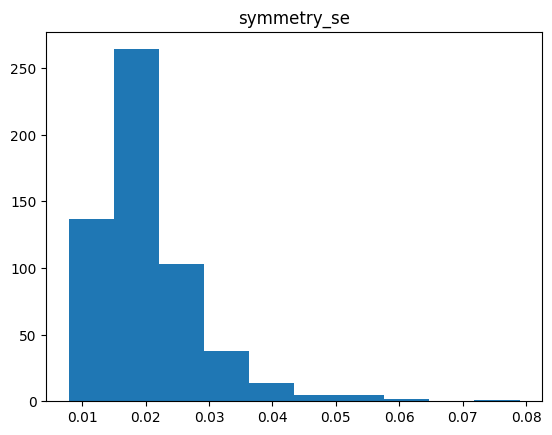

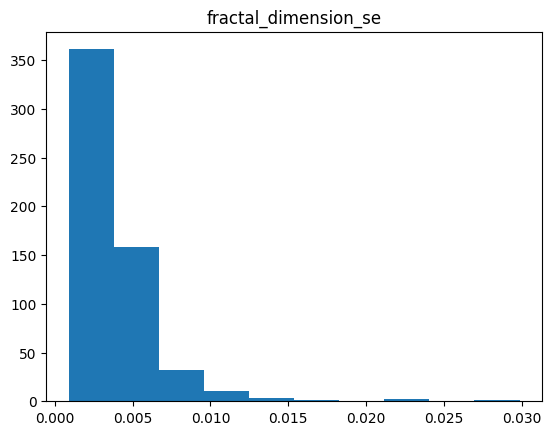

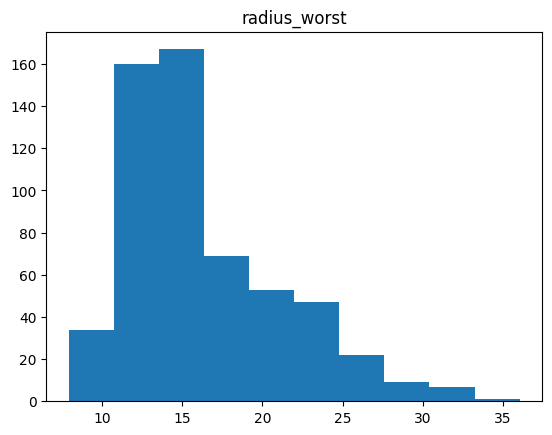

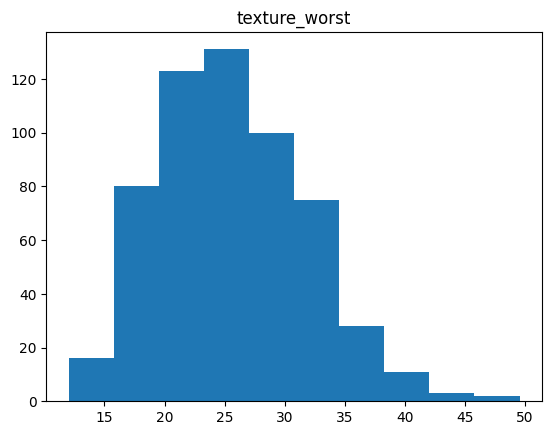

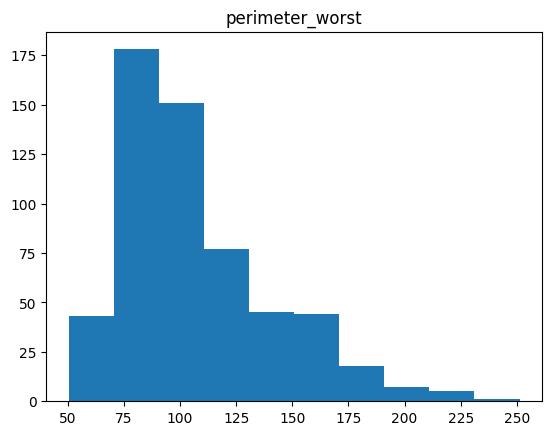

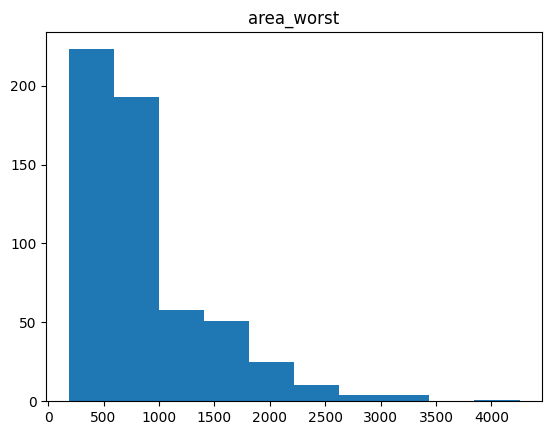

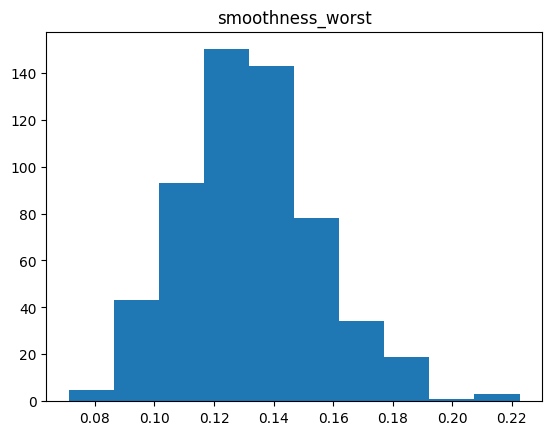

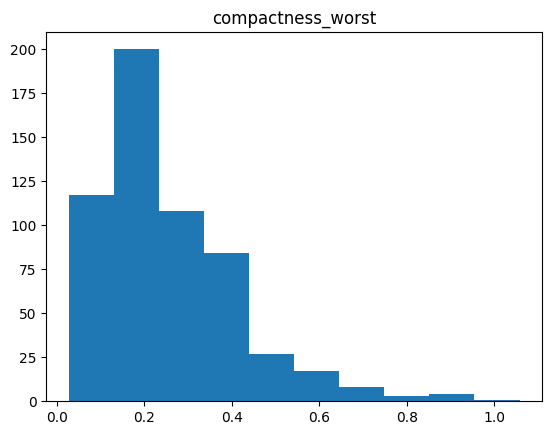

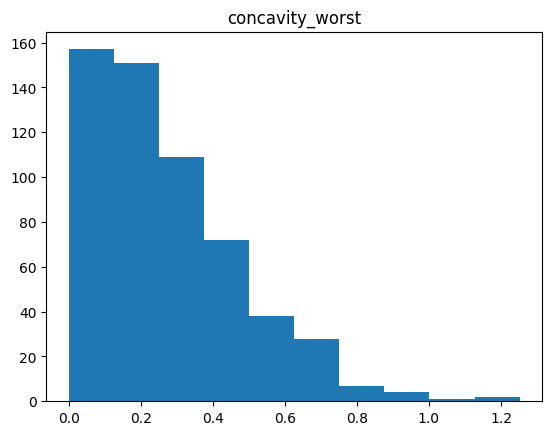

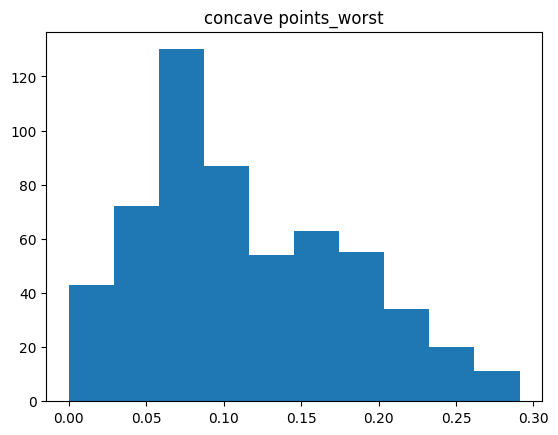

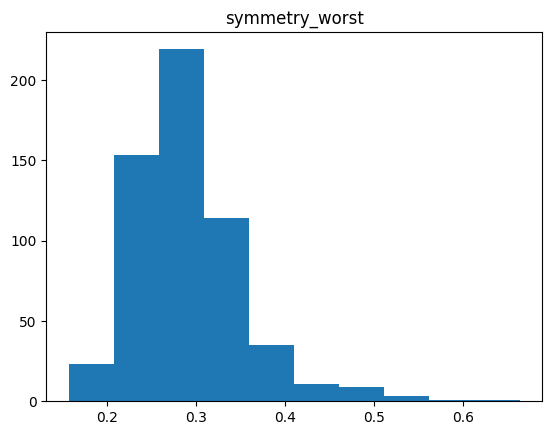

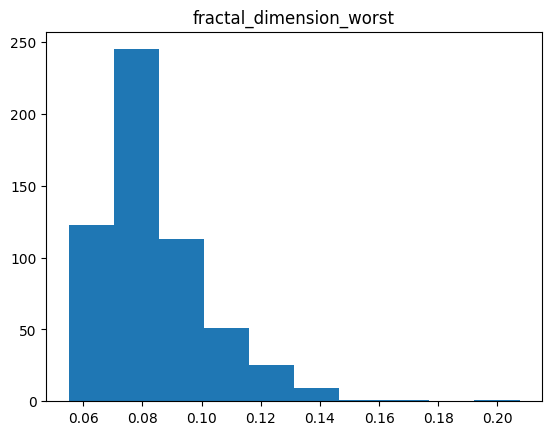

In [19]:
for col in df.columns:
  plt.hist(df[col])
  plt.title(col)
  plt.show()

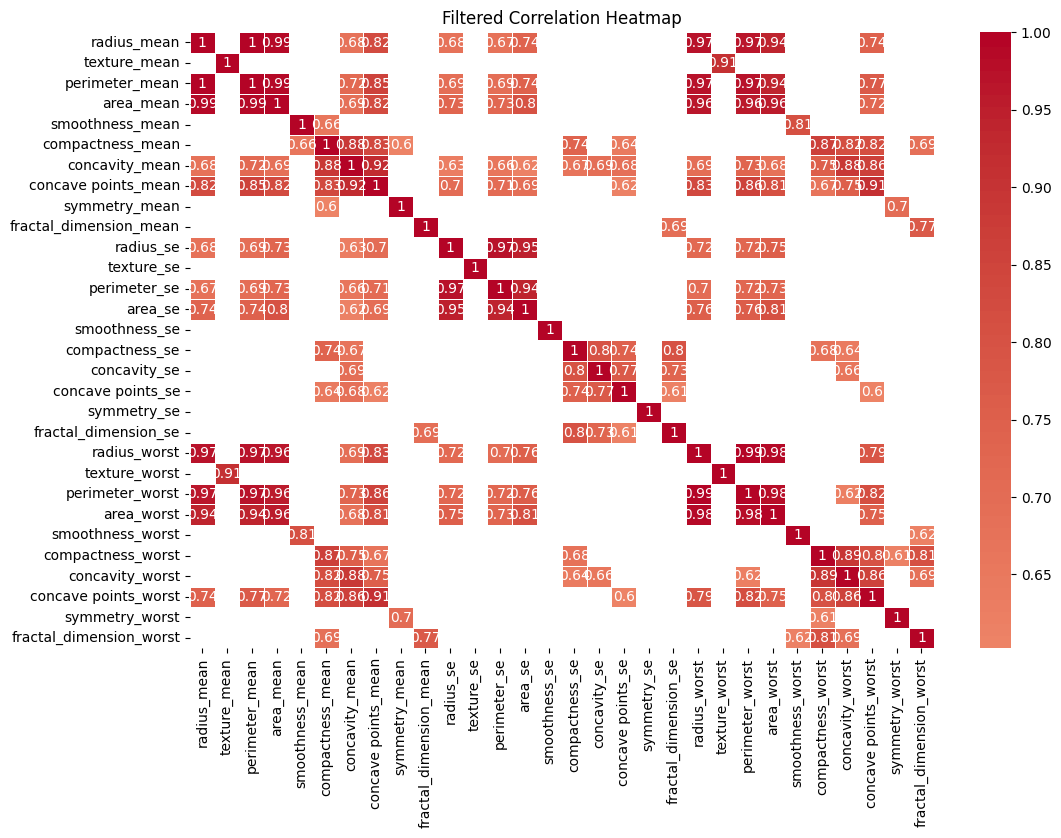

In [20]:
# Filter out weak correlations
plt.figure(figsize=(12, 8))
matrix = df.corr(numeric_only=True)
sns.heatmap(matrix[(matrix >= 0.6) | (matrix <= -0.6)], annot=True, cmap="coolwarm", linewidths=0.5, center=0)
plt.title("Filtered Correlation Heatmap")
plt.show()


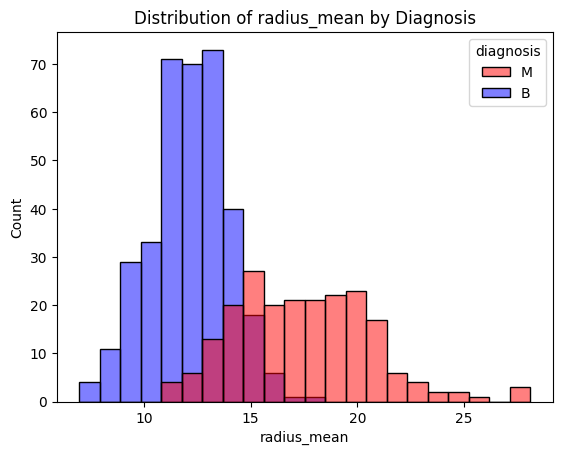

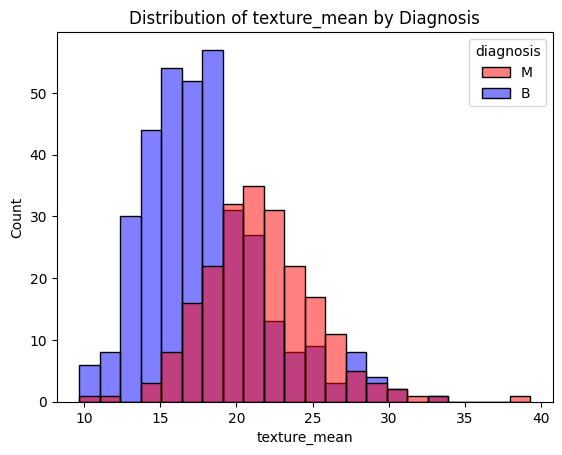

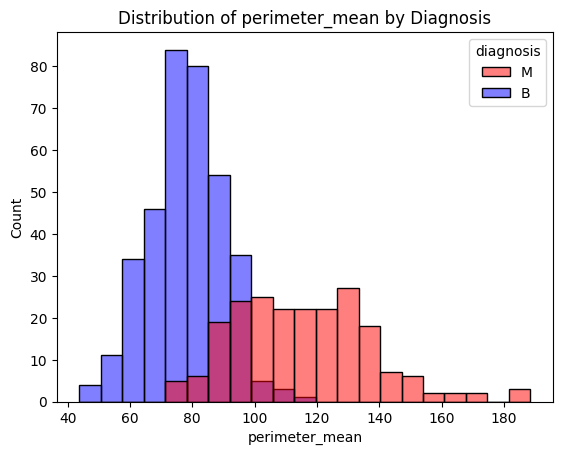

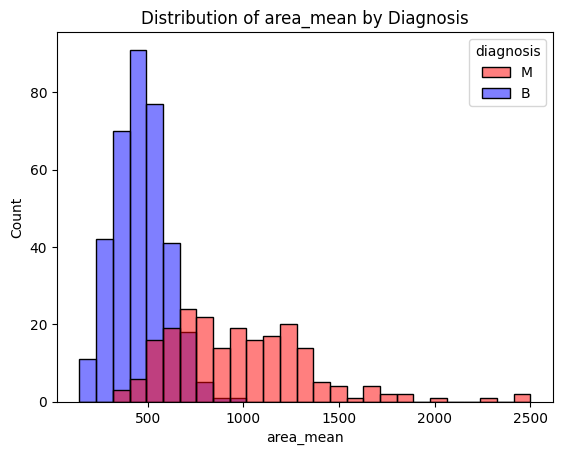

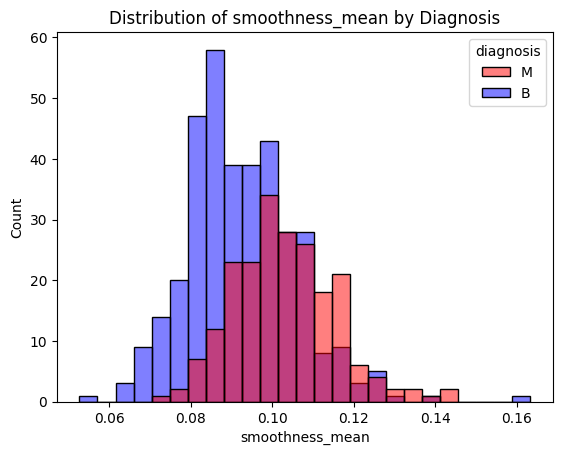

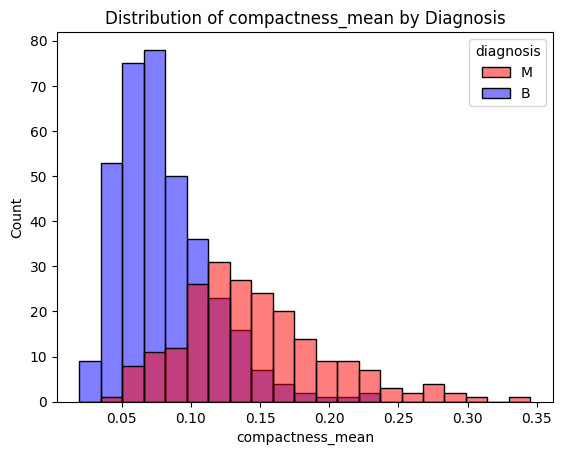

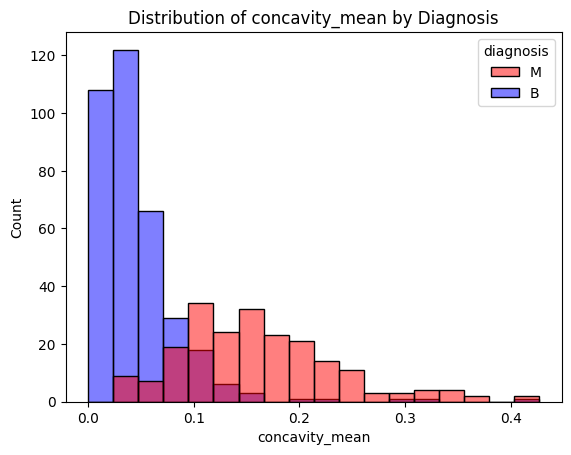

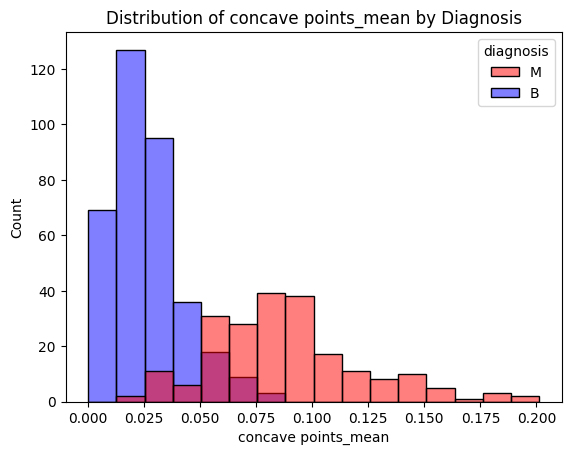

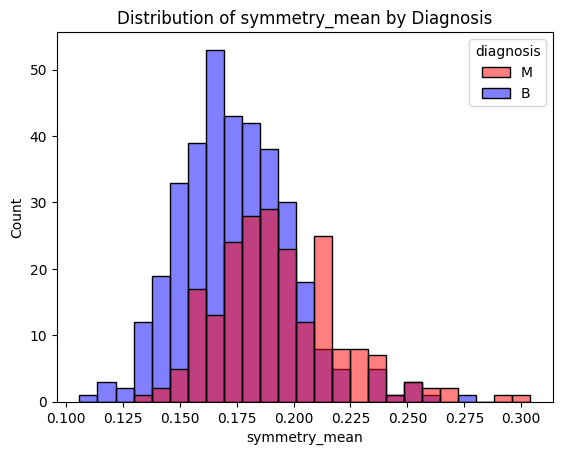

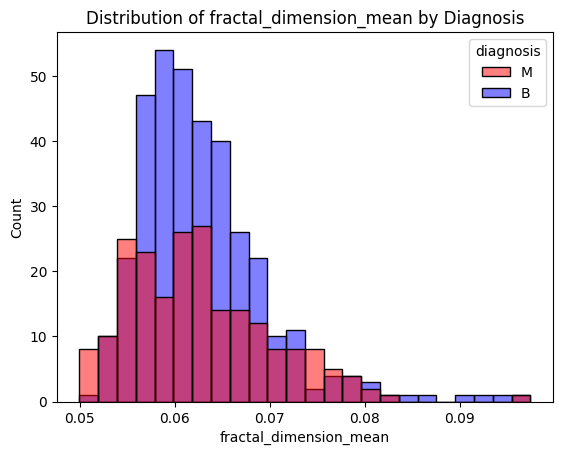

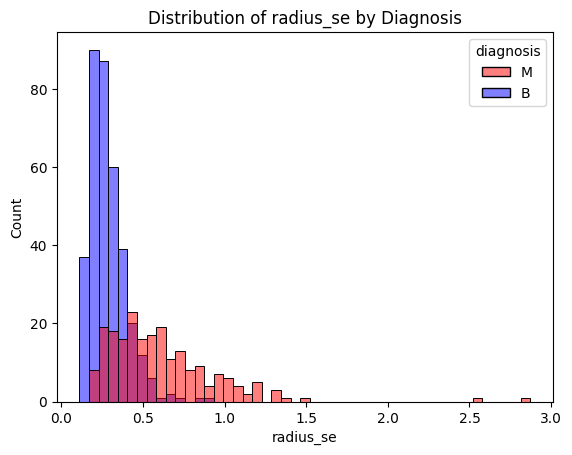

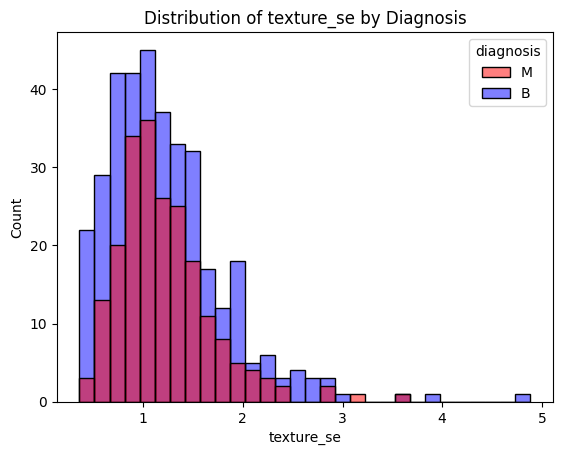

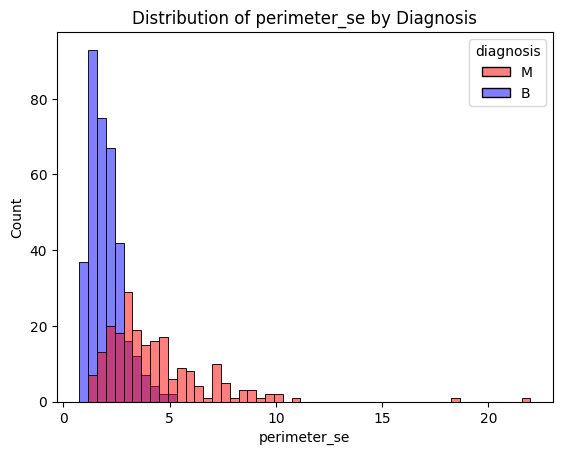

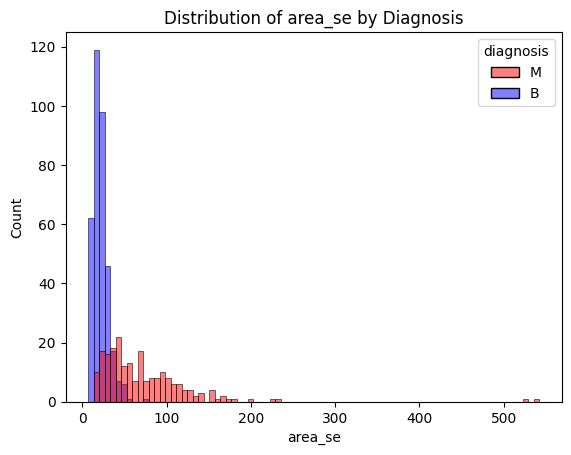

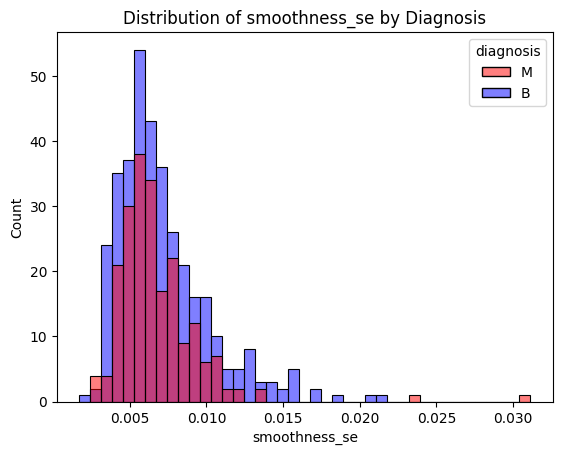

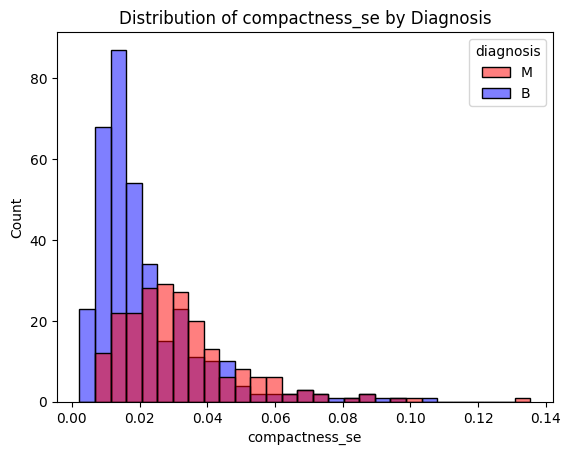

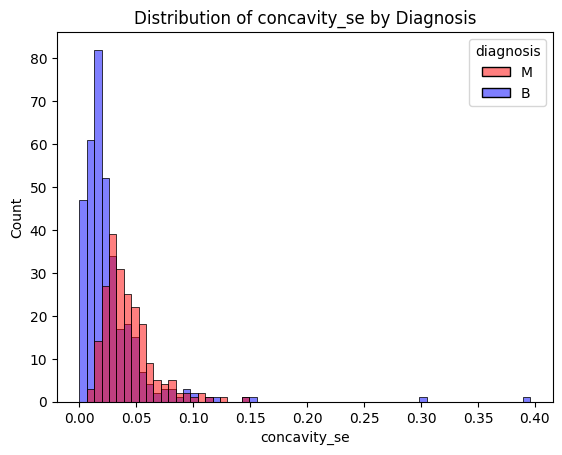

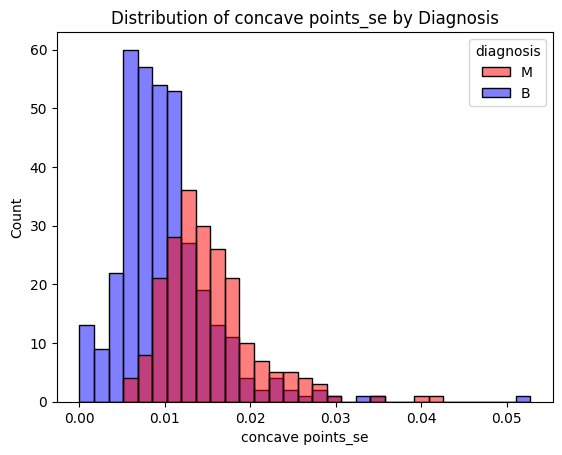

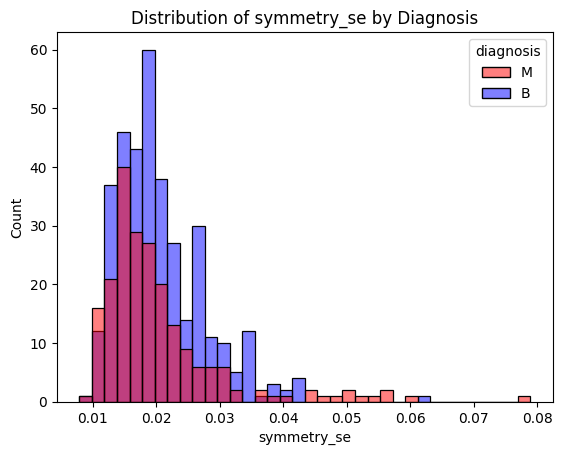

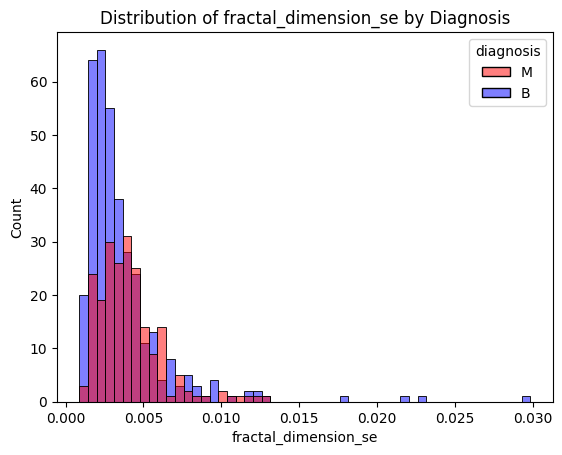

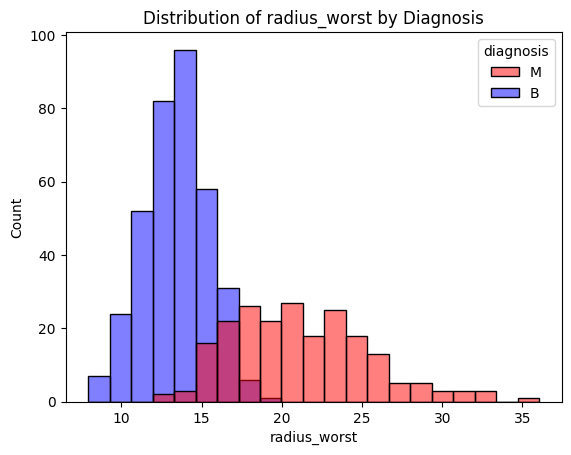

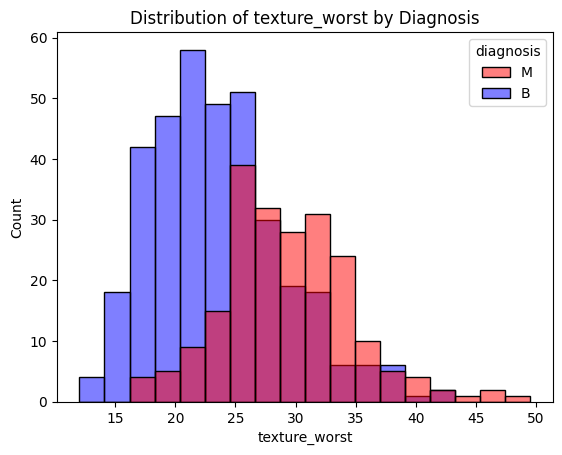

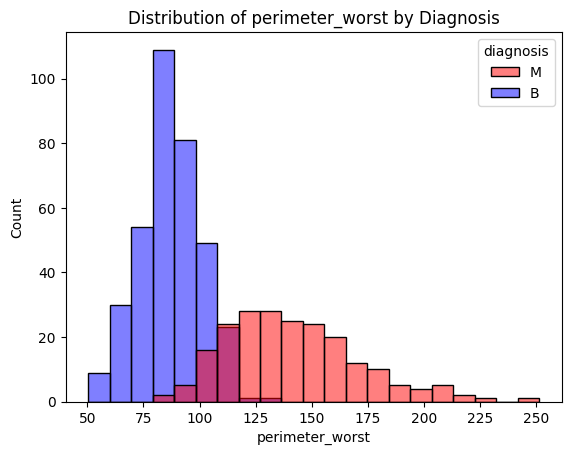

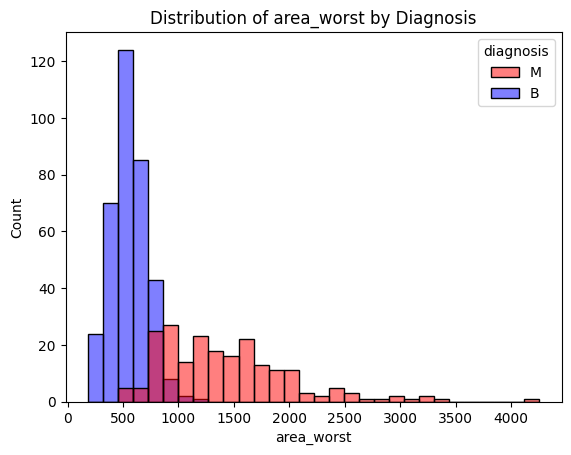

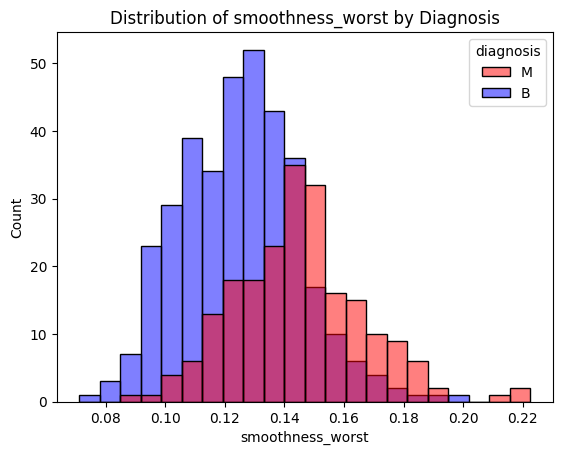

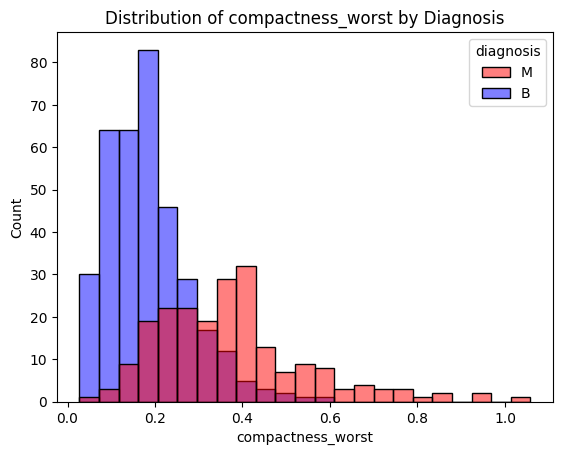

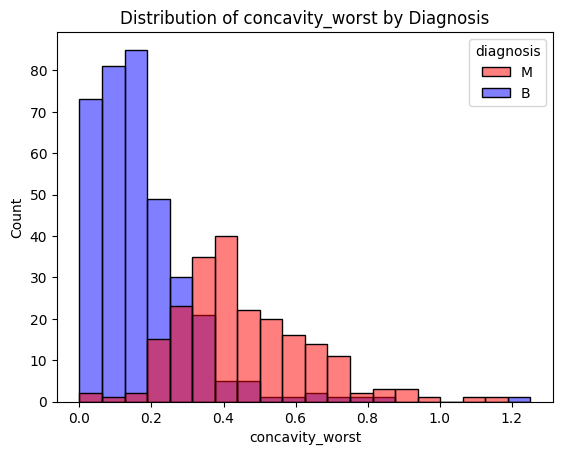

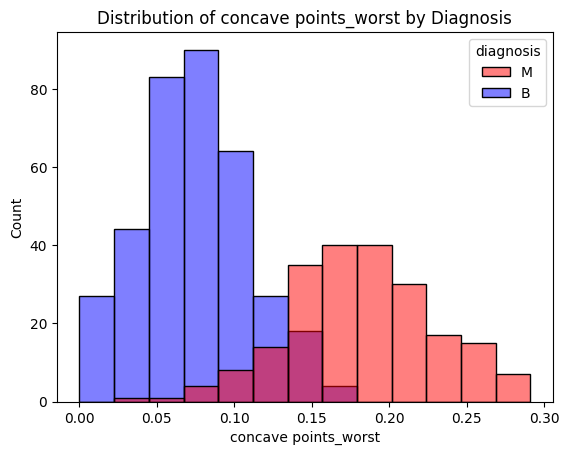

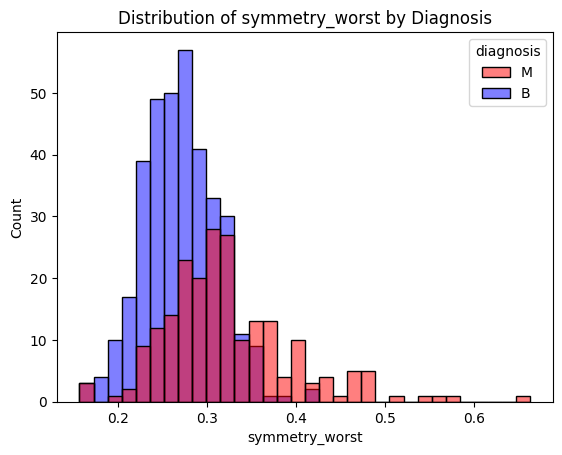

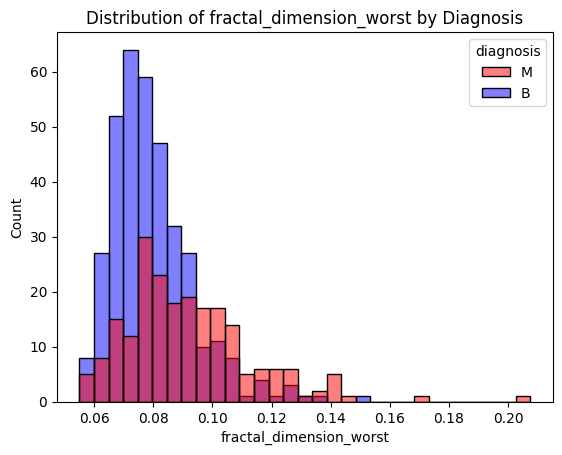

In [21]:
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        sns.histplot(data=df, x=col, hue="diagnosis",
                     palette=["red", "blue"], alpha=0.5)
        plt.title(f"Distribution of {col} by Diagnosis")
        plt.show()

In [22]:
max_values = df.groupby("diagnosis")["radius_mean"].max()
print(max_values)

diagnosis
B    17.85
M    28.11
Name: radius_mean, dtype: float64


In [23]:
min_value = df.groupby("diagnosis")["radius_mean"].min()
print(min_value)

diagnosis
B     6.981
M    10.950
Name: radius_mean, dtype: float64


In [24]:
df['diagnosis']=df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [25]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


model building

In [26]:
y=df[['diagnosis']]
x=df.drop('diagnosis',axis=1)

In [27]:
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(x, y.values.ravel())

In [28]:
sc=StandardScaler()
X_scaled = sc.fit_transform(X_selected)
selected_features = x.columns[selector.get_support()] # Get column names from original DataFrame 'x'
X_scaled = pd.DataFrame(X_scaled, columns=selected_features) # Use selected feature names for the DataFrame

In [29]:
# Get selected feature names
selected_features = x.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

In [30]:
X_selected_df.head()

,perimeter_mean,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,122.80,0.14710,25.38,184.60,0.2654
1,132.90,0.07017,24.99,158.80,0.1860
2,130.00,0.12790,23.57,152.50,0.2430
3,77.58,0.10520,14.91,98.87,0.2575
4,135.10,0.10430,22.54,152.20,0.1625


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_df, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
smote = SMOTE(random_state=40)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.values.ravel())

In [33]:
y_train_resampled=pd.Series(y_train_resampled)
print(y_train_resampled.value_counts())

1    285
0    285
Name: count, dtype: int64


In [34]:
# Random Forest Hyperparameters
rf_params = {
    "n_estimators": [50, 100, 200],
    "criterion" : ["gini", "entropy"]
}

# Decision Tree Hyperparameters
dt_params = {
    "criterion": ["gini", "entropy"]
}

# KNN Hyperparameters
knn_params = {
    "n_neighbors": np.arange(3, 30, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [35]:
# Initialize Models
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

# Apply RandomizedSearchCV
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, scoring="accuracy", random_state=42)
dt_random = RandomizedSearchCV(dt, dt_params, n_iter=10, cv=5, scoring="accuracy", random_state=42)
knn_random = RandomizedSearchCV(knn, knn_params, n_iter=10, cv=5, scoring="accuracy", random_state=42)

# Fit models
rf_random.fit(X_train_resampled, y_train_resampled)
dt_random.fit(X_train_resampled, y_train_resampled)
knn_random.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [36]:
X_train_resampled.head()

,perimeter_mean,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,102.70,0.03323,19.19,123.80,0.09975
1,78.85,0.03700,13.50,86.97,0.09391
2,82.63,0.01867,14.40,91.63,0.05601
3,102.10,0.09711,16.35,125.40,0.24750
4,122.10,0.07731,21.31,139.90,0.14900


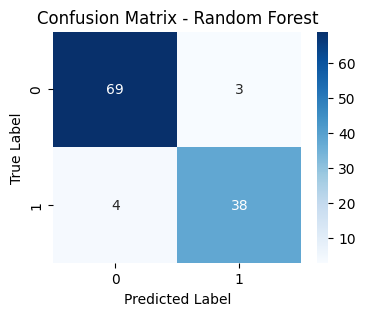

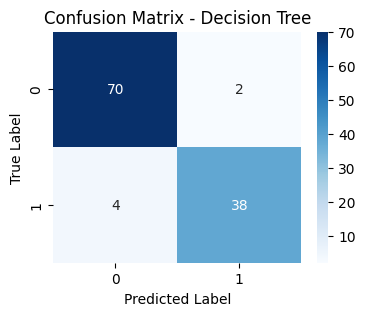

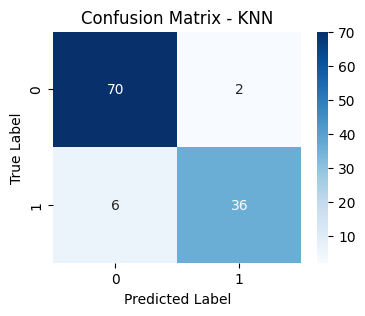

In [37]:
rf_pred = rf_random.predict(X_test)
dt_pred = dt_random.predict(X_test)
knn_pred = knn_random.predict(X_test)

# Function to plot confusion matrix
def plot_cm(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot CMs
plot_cm(y_test, rf_pred, "Random Forest")
plot_cm(y_test, dt_pred, "Decision Tree")
plot_cm(y_test, knn_pred, "KNN")

In [38]:
selected_features = ['perimeter_mean','concave points_mean','radius_worst','perimeter_worst','concave points_worst']
new_data = [[47.92,0,9.456,59.16,0]]
new_df = pd.DataFrame(new_data, columns=selected_features)

In [39]:
new_df_scaled=sc.transform(new_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [40]:
# Make a prediction
prediction = dt_random.best_estimator_.predict(new_df_scaled)
proba=dt_random.best_estimator_.predict_proba(new_df_scaled)

print("Predicted Class:", prediction[0])

Predicted Class: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [41]:
if prediction[0]==1:
  output="The patient is diagnosed with Breast Cancer"
  output1=f"Confidence {proba[0][1]*100:.2f}%"
else:
  output="The patient is not diagnosed with Breast Cancer"
  output1=""
print(output)
if output1:
  print(output1)

The patient is not diagnosed with Breast Cancer


In [42]:
proba

array([[1., 0.]])

In [43]:
importances = dt_random.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": selected_features, "Importance": importances})
print(feature_importance_df.sort_values(by="Importance", ascending=False))

                Feature  Importance
1   concave points_mean    0.679801
2          radius_worst    0.099676
4  concave points_worst    0.097830
3       perimeter_worst    0.092654
0        perimeter_mean    0.030039
